In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text processing with sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [77]:
df = pd.read_csv('/Users/annelahann/neue-fische/kickstarter-ml-project/data/data_clean.csv')
df.head()

,blurb,country,goal,name,state,main_category,sub_category,location_type,duration,deadline_month,deadline_day,launched_at_month,launched_at_day,target,baseline
0,A colorful Dia de los Muertos themed oracle de...,US,1000.0,The Ofrenda Oracle Deck,successful,games,playing cards,Town,30,9,9,8,10,1,1
1,"Electra's long awaited, eclectic Debut Pop/Roc...",US,15000.0,"Record Electra's Debut Album (Pop, Rock, Class...",successful,music,rock,Suburb,30,6,12,5,13,1,0
2,The Mist of Tribunal is a turn-based card game...,GB,10000.0,The Mist of Tribunal - A Card Game,failed,games,playing cards,Town,59,3,13,1,12,0,0
3,"Livng with a brain impairment, what its like t...",US,2800.0,Help change the face of Brain Impairment,successful,publishing,nonfiction,Town,30,1,9,12,10,1,1
4,Annapolis Chamber Players is a non-for profit ...,US,3500.0,Annapolis Chamber Music Project,successful,music,classical music,Town,30,5,2,4,2,1,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177522 entries, 0 to 177521
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   blurb              177514 non-null  object 
 1   country            177522 non-null  object 
 2   goal               177522 non-null  float64
 3   name               177522 non-null  object 
 4   state              177522 non-null  object 
 5   main_category      177522 non-null  object 
 6   sub_category       177522 non-null  object 
 7   location_type      177522 non-null  object 
 8   duration           177522 non-null  int64  
 9   deadline_month     177522 non-null  int64  
 10  deadline_day       177522 non-null  int64  
 11  launched_at_month  177522 non-null  int64  
 12  launched_at_day    177522 non-null  int64  
 13  target             177522 non-null  int64  
 14  baseline           177522 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 20

In [79]:
df.describe()

,goal,duration,deadline_month,deadline_day,launched_at_month,launched_at_day,target,baseline
count,1.775220e+05,177522.000000,177522.000000,177522.000000,177522.000000,177522.000000,177522.000000,177522.000000
mean,5.283794e+04,32.593250,6.715759,15.301884,6.424967,15.237385,0.531759,0.641797
std,1.252412e+06,11.836352,3.362235,9.068377,3.349665,8.855568,0.498992,0.479474
min,1.000000e-02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.500000e+03,29.000000,4.000000,7.000000,4.000000,8.000000,0.000000,0.000000
50%,5.000000e+03,30.000000,7.000000,15.000000,6.000000,15.000000,1.000000,1.000000
75%,1.500000e+04,34.000000,10.000000,23.000000,9.000000,23.000000,1.000000,1.000000
max,1.000000e+08,93.000000,12.000000,31.000000,12.000000,31.000000,1.000000,1.000000


<Axes: xlabel='target', ylabel='Count'>

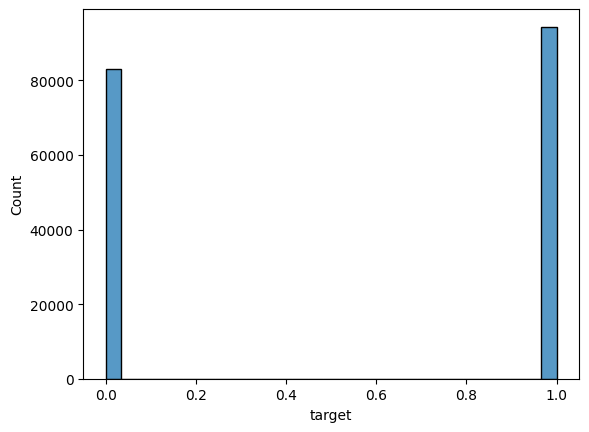

In [80]:
sns.histplot(data=df,x='target')

In [81]:
df['blurb'].value_counts().sort_index(ascending=True)
df['country'].value_counts().sort_index(ascending=True)

country
AT       403
AU      4098
BE       457
CA      8129
CH       542
DE      2771
DK       746
ES      1564
FR      2107
GB     18766
HK       701
IE       526
IT      1942
JP       227
LU        44
MX      1786
NL      1558
NO       434
NZ       781
SE      1136
SG       495
US    128309
Name: count, dtype: int64

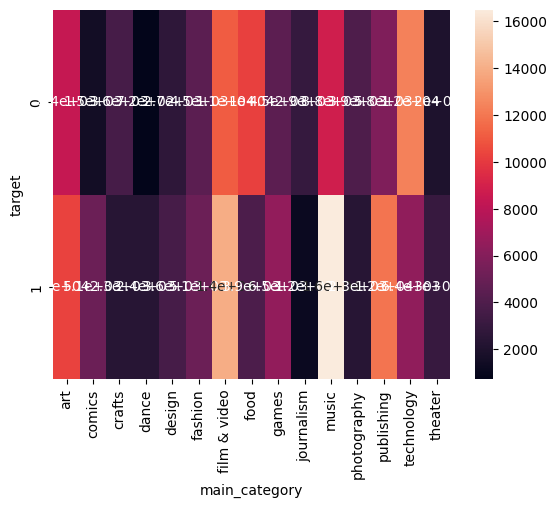

In [82]:
pt=df.pivot_table(index='target',columns='main_category',aggfunc='size',fill_value=0)
sns.heatmap(pt,annot=True)
plt.show()

In [84]:
pd.crosstab(df['main_category'],df['target'],normalize='index').sort_values(by=1,ascending=False)

target,0,1
main_category,,
comics,0.229468,0.770532
dance,0.232206,0.767794
publishing,0.328565,0.671435
music,0.349106,0.650894
theater,0.394341,0.605659
games,0.410324,0.589676
design,0.424156,0.575844
film & video,0.443699,0.556301
art,0.449079,0.550921


In [86]:
pd.crosstab(df['country'],df['target'],normalize='index').sort_values(by=1,ascending=False)

target,0,1
country,,
HK,0.343795,0.656205
JP,0.387665,0.612335
LU,0.431818,0.568182
GB,0.436747,0.563253
US,0.449836,0.550164
SG,0.466667,0.533333
DK,0.490617,0.509383
NZ,0.503201,0.496799
CA,0.514577,0.485423


In [87]:
df['goal'].describe()
df.groupby('target')['goal'].median().round()

target
0    7500.0
1    3500.0
Name: goal, dtype: float64

In [88]:
df.groupby('target')['goal'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,83123.0,98178.057121,1.809885e+06,1.00,2500.0,7500.0,25000.0,100000000.0
1,94399.0,12913.725528,2.488390e+05,0.01,1000.0,3500.0,10000.0,68000000.0


In [90]:
df.groupby('target')['duration'].mean()

target
0    34.573909
1    30.849183
Name: duration, dtype: float64

In [91]:
df['baseline']=df['goal'].apply(lambda x:1 if x<10000 else 0)
pd.crosstab(df['baseline'],df['target'])

target,0,1
baseline,,
0,38672,24917
1,44451,69482


In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report (df['target'],df['baseline']))
print(confusion_matrix (df['target'],df['baseline']))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53     83123
           1       0.61      0.74      0.67     94399

    accuracy                           0.61    177522
   macro avg       0.61      0.60      0.60    177522
weighted avg       0.61      0.61      0.60    177522

[[38672 44451]
 [24917 69482]]


In [17]:

df['target'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0).astype('int')

In [5]:
df_category_name = df[['category_name', 'target']]

In [6]:
df_category_name = df_category_name.groupby('category_name').agg(['mean', 'count'])

In [7]:
df_category_name.columns = ['success_rate', 'count']

In [8]:
df_category_name = df_category_name.sort_values(by='count', ascending=False)

In [9]:
df_category_name

,success_rate,count
category_name,,
Web,0.173085,4570
Product Design,0.852907,4351
Tabletop Games,0.826966,4057
Accessories,0.829590,3562
Comic Books,0.945039,3457
...,...,...
Quilts,0.366972,109
Games,0.568421,95
Letterpress,0.564516,62


In [23]:
corpus = df['name']
model = CountVectorizer(ngram_range = (2, 5), max_features = 100, token_pattern="[^\W\d_]+", stop_words='english')
matrix = model.fit_transform(corpus).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())
df_output.T.head(10)

df_output.sum().sort_values(ascending=False).head(10)

short film       2481
enamel pins      2095
debut album      1536
world s          1456
playing cards    1451
new album        1425
enamel pin       1172
children s        972
music video       931
feature film      871
dtype: int64

In [24]:
# merge the dataframes
df = pd.concat([df, df_output], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Columns: 120 entries, backers_count to world s
dtypes: bool(2), float64(3), int64(103), object(12)
memory usage: 188.8+ MB


There are 7630535 words in the combination of all review.


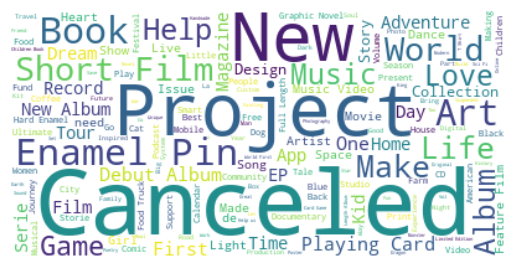

In [26]:
# plot wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df.name)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 4435713 words in the combination of all review.


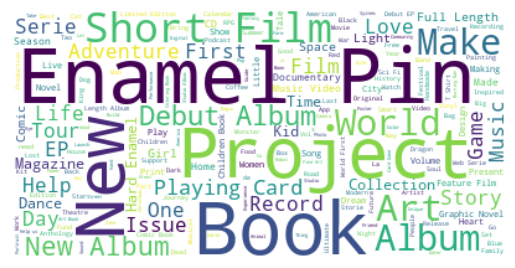

In [27]:
# top words in successful projects
text = " ".join(review for review in df[df.target == 1].name)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# get all rows with colunm name containing 'Enamel Pin'

df[df.name.str.contains('Enamel Pin')]




,backers_count,blurb,converted_pledged_amount,country,created_at,currency,deadline,goal,launched_at,name,...,studio album,t shirt,t shirts,th anniversary,video game,virtual reality,visual novel,web series,women s,world s
9,76,Hard Enamel Pins inspired by companions from D...,2552,GB,2019-01-09 22:05:06,GBP,2019-02-20 13:00:01,380.0,2019-01-21 13:00:01,Dragon Age Character Profile Hard Enamel Pin B...,...,0,0,0,0,0,0,0,0,0,0
35,42,Empress is here to help you decorate your clot...,1335,AU,2018-11-22 08:08:56,AUD,2019-01-31 07:00:00,1800.0,2018-12-09 09:25:30,"Enamel Pins, cute and cheeky, by Empress Eyrie",...,0,0,0,0,0,0,0,0,0,0
96,231,Hard Enamel Pins,7635,US,2019-02-23 01:28:59,USD,2019-04-01 06:59:00,350.0,2019-03-01 19:59:02,Whalephat's Hard Enamel Pins Vol. II,...,0,0,0,0,0,0,0,0,0,0
111,61,Cute animal-themed enamel pins!,1123,US,2019-01-17 21:18:32,USD,2019-02-06 21:05:52,550.0,2019-01-22 21:05:52,Animal Party! Enamel Pins,...,0,0,0,0,0,0,0,0,0,0
113,89,Rococopunk / Steampunk-inspired Pokeball Lapel...,2344,US,2017-12-09 17:03:05,USD,2018-01-26 05:00:40,1300.0,2017-12-12 05:00:40,Rococoballs - Pokemon x Rococo Pokeball Enamel...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208118,20,Enamel pins of certain Mass Effect Characters,760,GB,2019-01-13 20:37:27,GBP,2019-02-28 16:38:27,300.0,2019-01-14 16:38:27,"Enamel Pins Mass Effect Companions :Javik, EDI...",...,0,0,0,0,0,0,0,0,0,0
208153,304,Video Game Hard Enamel Pins,10413,US,2019-01-28 09:20:46,USD,2019-03-15 21:05:28,300.0,2019-02-13 21:05:28,Jonpeito's Video Game Hard Enamel Pin Collection,...,0,0,0,0,1,0,0,0,0,0
208182,9,This will be a 1.5 inch hard enamel ENTIRELY G...,281,US,2018-01-09 02:07:55,USD,2018-02-09 23:57:33,250.0,2018-01-10 23:57:33,Silver Surfer Glitter Hard Enamel Pin,...,0,0,0,0,0,0,0,0,0,0
208241,69,An adorable enamel pin of a sausage dog.,942,GB,2017-05-13 15:00:06,GBP,2017-06-11 22:59:00,340.0,2017-05-15 14:58:54,Sausage Dog Enamel Pin,...,0,0,0,0,0,0,0,0,0,0
